In [1]:
#intsall package
!pip install plotly

# install package
!pip install squarify

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

import squarify # for tree maps
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
traindata=pd.read_csv("train.csv")
testdata=pd.read_csv("test.csv")

In [4]:
traindata.shape

(103904, 25)

In [5]:
testdata.shape

(25976, 25)

In [6]:
l=[traindata.columns]

In [7]:
l

[Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
        'Class', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
        'satisfaction'],
       dtype='object')]

In [8]:
traindata.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [9]:
traindata["Customer Type"].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [10]:
traindata["Type of Travel"].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [11]:
traindata["Class"].head()

0    Eco Plus
1    Business
2    Business
3    Business
4    Business
Name: Class, dtype: object

In [12]:
traindata.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [13]:
testdata.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [14]:
testdata.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [15]:
median_arrival_delay = traindata['Arrival Delay in Minutes'].mean()
median_arrival_delay1= testdata['Arrival Delay in Minutes'].mean()

traindata['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)
testdata['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)

In [16]:
print(traindata.isnull().sum())
print(testdata.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Unnamed: 0  

In [17]:
for i in traindata.columns:
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(traindata[i].unique()),traindata[i].unique()))
    print ("---------------------- \n")

Number of unique values in Unnamed: 0 column are 103904 
 The unique values are [     0      1      2 ... 103901 103902 103903]
---------------------- 

Number of unique values in id column are 103904 
 The unique values are [ 70172   5047 110028 ...  68825  54173  62567]
---------------------- 

Number of unique values in Gender column are 2 
 The unique values are ['Male' 'Female']
---------------------- 

Number of unique values in Customer Type column are 2 
 The unique values are ['Loyal Customer' 'disloyal Customer']
---------------------- 

Number of unique values in Age column are 75 
 The unique values are [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
---------------------- 

Number of unique values in Type of Travel column are 2 
 The unique values are ['Personal Travel' 'Business travel']
-----

In [18]:
unique_train=traindata[['Unnamed: 0','id']]
unique_test=testdata[['Unnamed: 0','id']]

In [19]:
traindata.drop(['Unnamed: 0','id'],axis=1,inplace=True)
testdata.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [20]:
cat_cols=traindata.select_dtypes(include="object")
num_cols=traindata.select_dtypes(include=["int64","float64"])

In [21]:
num_cols.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [22]:
target={
    "satisfaction":1,
    "neutral or dissatisfied":0
}
traindata=traindata.replace({'satisfaction':target})

In [23]:
cat_cols=traindata.select_dtypes(include="object")
num_cols=traindata.select_dtypes(include=["int64","float64"])

In [24]:
from scipy.stats import chi2_contingency

selected_columns = ['Age', 'Flight Distance', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                    'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service',
                    'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for column in selected_columns:
    contingency_table = pd.crosstab(traindata[column], traindata['satisfaction'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test results for {column}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p_value}")
    print()


Chi-square test results for Age:
Chi-square statistic: 9082.656883350373
p-value: 0.0

Chi-square test results for Flight Distance:
Chi-square statistic: 15406.582821187714
p-value: 0.0

Chi-square test results for Inflight wifi service:
Chi-square statistic: 28696.409226996497
p-value: 0.0

Chi-square test results for Departure/Arrival time convenient:
Chi-square statistic: 451.0626367029049
p-value: 2.8976924656572356e-95

Chi-square test results for Ease of Online booking:
Chi-square statistic: 10407.606041979692
p-value: 0.0

Chi-square test results for Gate location:
Chi-square statistic: 2493.443647341715
p-value: 0.0

Chi-square test results for Food and drink:
Chi-square statistic: 5203.235820229115
p-value: 0.0

Chi-square test results for Online boarding:
Chi-square statistic: 39750.99560405667
p-value: 0.0

Chi-square test results for Seat comfort:
Chi-square statistic: 15756.130078746308
p-value: 0.0

Chi-square test results for Inflight entertainment:
Chi-square statistic:

In [25]:
insignificant_features=['Arrival Delay in Minutes','Departure Delay in Minutes','Departure/Arrival time convenient']

From the above evaluation, Arrival and departure delay in minutes and Departure/Arrival time convenient are insignificant based on p-values obtained.

In [26]:
traindata.drop(['Arrival Delay in Minutes','Departure Delay in Minutes','Departure/Arrival time convenient'],axis=1,inplace=True)
testdata.drop(['Arrival Delay in Minutes','Departure Delay in Minutes','Departure/Arrival time convenient'],axis=1,inplace=True)

In [27]:
wifi = {
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}

online_booking={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
gate_location={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
FoodnDrinks={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
online_boarding={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
seat_comfort={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}       
entertainment={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
onboard_service={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
leg_room={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
baggage_handling={
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5:"Excellent"
}
checkin={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
inflight_s={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
cleanliness_new={
    0: "Very poor",
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}
target={
    1:"satisfied",
    0:"neutral or dissatisfied"
}


In [28]:
sub_traindata=traindata.replace({'Inflight wifi service':wifi,'Ease of Online booking':online_booking,
       'Gate location':gate_location, 'Food and drink':FoodnDrinks, 'Online boarding':online_boarding, 'Seat comfort':seat_comfort,
       'Inflight entertainment':entertainment, 'On-board service':onboard_service, 'Leg room service':leg_room,
       'Baggage handling':baggage_handling, 'Checkin service':checkin, 'Inflight service':inflight_s,
       'Cleanliness':cleanliness_new,'satisfaction':target})

In [29]:
sub_traindata

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance Inflight wifi service Ease of Online booking  \
0                   460                  Good                   Good   
1                   235                  Good                   Good   
2                  1142                  Fair                   Fair   
3                   562                  Fair              Excellent   
4                   214                  Good                   Good   
...                 ...                   ...                    ...   
103899              192                  Fair                   Fair   
103900             2347             Very Good              Very Good   
103901             1995                  Poor                   Poor   
103902             1000                  Poor                   Poor   
103903             1723                  Poor                   Good   

       Gate location Food and drink Online boarding Seat comfort  \
0               Poor      Excellent            Good    Excellent   
1               Good           Poor            Good         Poor   
2               Fair      Excellent       Excellent    Excellent   
3          Excellent           Fair            Fair         Fair   
4               Good      Very Good       Excellent    Excellent   
...              ...            ...             ...          ...   
103899          Good           Fair            Fair         Fair   
103900     Very Good           Fair       Very Good    Excellent   
103901          Good      Very Good            Poor    Excellent   
103902     Excellent           Poor            Poor         Poor   
103903          Good           Poor            Poor         Poor   

       Inflight entertainment On-board service Leg room service  \
0                   Excellent        Very Good             Good   
1                        Poor             Poor        Excellent   
2                   Excellent        Very Good             Good   
3                        Fair             Fair        Excellent   
4                        Good             Good        Very Good   
...                       ...              ...              ...   
103899                   Fair             Good             Poor   
103900              Excellent        Excellent        Excellent   
103901              Very Good             Good             Fair   
103902                   Poor        Very Good        Excellent   
103903                   Poor             Poor             Poor   

       Baggage handling Checkin service Inflight service Cleanliness  \
0             Very Good       Very Good        Excellent   Excellent   
1                  Good            Poor        Very Good        Poor   
2             Very Good       Very Good        Very Good   Excellent   
3                  Good            Poor        Very Good        Fair   
4             Very Good            Good             Good        Good   
...                 ...             ...              ...         ...   
103899        Very Good            Fair             Good        Fair   
103900        Excellent       Excellent        Excellent   Very Good   
103901        Very Good       Excellent     

In [30]:
traindata=traindata.replace({'satisfaction':target})

In [31]:
traindata

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  Ease of Online booking  \
0                   460                      3                       3   
1                   235                      3                       3   
2                  1142                      2                       2   
3                   562                      2                       5   
4                   214                      3                       3   
...                 ...                    ...                     ...   
103899              192                      2                       2   
103900             2347                      4                       4   
103901             1995                      1                       1   
103902             1000                      1                       1   
103903             1723                      1                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2           

In [32]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [33]:
def plot_bar(col_name):
    temp = sub_traindata[col_name].value_counts()
    d = [go.Bar(
            x=temp.index,
            y=np.round(temp.values/temp.values.sum(),4)*100,
            text=['{}%'.format(i) for i in np.round(temp.values/temp.values.sum(),4)*100],
            textposition='auto',
            marker=dict(color='#0047AB'),
        )]
    layout_bar = generate_layout_bar(col_name=col_name)
    fig = go.Figure(data=d, layout=layout_bar)
    return iplot(fig)

In [34]:
age_bins = [0, 10, 20, 40, 60, 100]
age_labels = ['Children', 'teenagers', 'Middle-aged adults', 'Older adults', 'Senior citizens']

# Create a new column 'Age Category' based on the age bins
sub_traindata['Age Category'] = pd.cut(sub_traindata['Age'], bins=age_bins, labels=age_labels, right=False)

In [35]:
cat_cols = []

for i in sub_traindata.columns:
    if sub_traindata[i].dtype =='object' or len(np.unique(sub_traindata[i]))<=15 : # if the number of levels is less that 15 considering the column as categorial
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(sub_traindata[i])),np.unique(sub_traindata[i])))

Gender : 2 : ['Female' 'Male'] 
Customer Type : 2 : ['Loyal Customer' 'disloyal Customer'] 
Type of Travel : 2 : ['Business travel' 'Personal Travel'] 
Class : 3 : ['Business' 'Eco' 'Eco Plus'] 
Inflight wifi service : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Ease of Online booking : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Gate location : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Food and drink : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Online boarding : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Seat comfort : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Inflight entertainment : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
On-board service : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Leg room service : 6 : ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good' 'Very poor'] 
Baggage handling : 5 : ['Excellent' 'Fair' 'Good' '

In [36]:
num_cols = [i for i in sub_traindata.columns if i not in cat_cols]
num_cols

['Age', 'Flight Distance']

In [37]:
for i in cat_cols:
    plot_bar(i)

# BIVARIATE ANALYSIS

In [38]:
Gender_sat = sub_traindata.groupby(['Gender','satisfaction']).size().reset_index()
Gender_sat.columns = ['Gender','satisfaction','Count']
Gender_sat

Gender             satisfaction  Count
0  Female  neutral or dissatisfied  30193
1  Female                satisfied  22534
2    Male  neutral or dissatisfied  28686
3    Male                satisfied  22491

In [39]:
trace1 = go.Bar(
    x=Gender_sat[Gender_sat['satisfaction'] == 'satisfied']['Gender'],
    y=Gender_sat[Gender_sat['satisfaction'] == 'satisfied']['Count'],
    text=Gender_sat[Gender_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=Gender_sat[Gender_sat['satisfaction'] == 'neutral or dissatisfied']['Gender'],
    y=Gender_sat[Gender_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=Gender_sat[Gender_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d2 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Gender and Satisfaction'
)

fig = go.Figure(data=d2, layout=layout)
iplot(fig)


In [40]:
age_sat = sub_traindata.groupby(['Age Category','satisfaction']).size().reset_index()
age_sat.columns = ['Age Category','satisfaction','Count']
age_sat

Age Category             satisfaction  Count
0            Children  neutral or dissatisfied   1674
1            Children                satisfied    220
2           teenagers  neutral or dissatisfied   6378
3           teenagers                satisfied   1541
4  Middle-aged adults  neutral or dissatisfied  25640
5  Middle-aged adults                satisfied  15933
6        Older adults  neutral or dissatisfied  18104
7        Older adults                satisfied  24695
8     Senior citizens  neutral or dissatisfied   7083
9     Senior citizens                satisfied   2636

In [41]:
trace1 = go.Bar(
    x=age_sat[age_sat['satisfaction'] == 'satisfied']['Age Category'],
    y=age_sat[age_sat['satisfaction'] == 'satisfied']['Count'],
    text=age_sat[age_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=age_sat[age_sat['satisfaction'] == 'neutral or dissatisfied']['Age Category'],
    y=age_sat[age_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=age_sat[age_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d4 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Age and Satisfaction'
)

fig = go.Figure(data=d4, layout=layout)
iplot(fig)

In [42]:
ctype_sat = sub_traindata.groupby(['Customer Type','satisfaction']).size().reset_index()
ctype_sat.columns = ['Customer Type','satisfaction','Count']
ctype_sat

Customer Type             satisfaction  Count
0     Loyal Customer  neutral or dissatisfied  44390
1     Loyal Customer                satisfied  40533
2  disloyal Customer  neutral or dissatisfied  14489
3  disloyal Customer                satisfied   4492

In [43]:
trace1 = go.Bar(
    x=ctype_sat[ctype_sat['satisfaction'] == 'satisfied']['Customer Type'],
    y=ctype_sat[ctype_sat['satisfaction'] == 'satisfied']['Count'],
    text=ctype_sat[ctype_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=ctype_sat[ctype_sat['satisfaction'] == 'neutral or dissatisfied']['Customer Type'],
    y=ctype_sat[ctype_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=ctype_sat[ctype_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d5 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Customer type and Satisfaction'
)

fig = go.Figure(data=d5, layout=layout)
iplot(fig)

In [44]:
tt_sat = sub_traindata.groupby(['Type of Travel','satisfaction']).size().reset_index()
tt_sat.columns = ['Type of Travel','satisfaction','Count']
tt_sat

Type of Travel             satisfaction  Count
0  Business travel  neutral or dissatisfied  29909
1  Business travel                satisfied  41746
2  Personal Travel  neutral or dissatisfied  28970
3  Personal Travel                satisfied   3279

In [45]:
trace1 = go.Bar(
    x=tt_sat[tt_sat['satisfaction'] == 'satisfied']['Type of Travel'],
    y=tt_sat[tt_sat['satisfaction'] == 'satisfied']['Count'],
    text=tt_sat[tt_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=tt_sat[tt_sat['satisfaction'] == 'neutral or dissatisfied']['Type of Travel'],
    y=tt_sat[tt_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=tt_sat[tt_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d4 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Type of travel and Satisfaction'
)

fig = go.Figure(data=d4, layout=layout)
iplot(fig)

In [46]:
class_sat = sub_traindata.groupby(['Class','satisfaction']).size().reset_index()
class_sat.columns = ['Class','satisfaction','Count']
class_sat

Class             satisfaction  Count
0  Business  neutral or dissatisfied  15185
1  Business                satisfied  34480
2       Eco  neutral or dissatisfied  38044
3       Eco                satisfied   8701
4  Eco Plus  neutral or dissatisfied   5650
5  Eco Plus                satisfied   1844

In [47]:
trace1 = go.Bar(
    x=class_sat[class_sat['satisfaction'] == 'satisfied']['Class'],
    y=class_sat[class_sat['satisfaction'] == 'satisfied']['Count'],
    text=class_sat[class_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=class_sat[class_sat['satisfaction'] == 'neutral or dissatisfied']['Class'],
    y=class_sat[class_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=class_sat[class_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d4 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Class and Satisfaction'
)

fig = go.Figure(data=d4, layout=layout)
iplot(fig)

In [48]:
fd_sat = sub_traindata.groupby(['Food and drink','satisfaction']).size().reset_index()
fd_sat.columns = ['Food and drink','satisfaction','Count']
fd_sat

Food and drink             satisfaction  Count
0       Excellent  neutral or dissatisfied  10063
1       Excellent                satisfied  12250
2            Fair  neutral or dissatisfied  13458
3            Fair                satisfied   8530
4            Good  neutral or dissatisfied  13461
5            Good                satisfied   8839
6            Poor  neutral or dissatisfied  10269
7            Poor                satisfied   2568
8       Very Good  neutral or dissatisfied  11571
9       Very Good                satisfied  12788
10      Very poor  neutral or dissatisfied     57
11      Very poor                satisfied     50

In [49]:
trace1 = go.Bar(
    x=fd_sat[fd_sat['satisfaction'] == 'satisfied']['Food and drink'],
    y=fd_sat[fd_sat['satisfaction'] == 'satisfied']['Count'],
    text=fd_sat[fd_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=fd_sat[fd_sat['satisfaction'] == 'neutral or dissatisfied']['Food and drink'],
    y=fd_sat[fd_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=fd_sat[fd_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d5 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Food & drinks and Satisfaction'
)

fig = go.Figure(data=d5, layout=layout)
iplot(fig)

In [50]:
wifi_sat = sub_traindata.groupby(['Inflight wifi service','satisfaction']).size().reset_index()
wifi_sat.columns = ['Inflight wifi service','satisfaction','Count']
wifi_sat

Inflight wifi service             satisfaction  Count
0              Excellent  neutral or dissatisfied    106
1              Excellent                satisfied  11363
2                   Fair  neutral or dissatisfied  19407
3                   Fair                satisfied   6423
4                   Good  neutral or dissatisfied  19386
5                   Good                satisfied   6482
6                   Poor  neutral or dissatisfied  12034
7                   Poor                satisfied   5806
8              Very Good  neutral or dissatisfied   7938
9              Very Good                satisfied  11856
10             Very poor  neutral or dissatisfied      8
11             Very poor                satisfied   3095

In [51]:
trace1 = go.Bar(
    x=wifi_sat[wifi_sat['satisfaction'] == 'satisfied']['Inflight wifi service'],
    y=wifi_sat[wifi_sat['satisfaction'] == 'satisfied']['Count'],
    text=wifi_sat[wifi_sat['satisfaction'] == 'satisfied']['Count'],
    textposition='auto',
    name='Satisfied'
)

trace2 = go.Bar(
    x=wifi_sat[wifi_sat['satisfaction'] == 'neutral or dissatisfied']['Inflight wifi service'],
    y=wifi_sat[wifi_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    text=wifi_sat[wifi_sat['satisfaction'] == 'neutral or dissatisfied']['Count'],
    textposition='auto',
    name='Neutral or Dissatisfied'
)

d4 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Wifi and Satisfaction'
)

fig = go.Figure(data=d4, layout=layout)
iplot(fig)

In [52]:
tc= sub_traindata.groupby(['Type of Travel','Class']).size().reset_index()
tc.columns = ['Type of Travel','Class','Count']
tc

Type of Travel     Class  Count
0  Business travel  Business  47508
1  Business travel       Eco  20257
2  Business travel  Eco Plus   3890
3  Personal Travel  Business   2157
4  Personal Travel       Eco  26488
5  Personal Travel  Eco Plus   3604

In [53]:
trace1 = go.Bar(
    x=tc[tc['Type of Travel'] == 'Business travel']['Class'],
    y=tc[tc['Type of Travel'] == 'Business travel']['Count'],
    text=tc[tc['Type of Travel'] == 'Business travel']['Count'],
    textposition='auto',
    name='Business travel'
)

trace2 = go.Bar(
    x=tc[tc['Type of Travel'] == 'Personal Travel']['Class'],
    y=tc[tc['Type of Travel'] == 'Personal Travel']['Count'],
    text=tc[tc['Type of Travel'] == 'Personal Travel']['Count'],
    textposition='auto',
    name='Personal Travel'
)

d4 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Type of travel and the class they travel in'
)

fig = go.Figure(data=d4, layout=layout)
iplot(fig)

In [54]:
features = ['Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service', 'Inflight service', 'Baggage handling', 'Checkin service',
            'Cleanliness']

for feature in features:
    temp = sub_traindata.groupby(['Class', feature]).size().reset_index()
    temp.columns = ['Class', feature, 'Count']

    trace1 = go.Bar(
        x=temp[temp['Class'] == 'Business']['Count'],
        y=temp[temp['Class'] == 'Business'][feature],
        orientation='h',
        text=temp[temp['Class'] == 'Business']['Count'],
        textposition='auto',
        name='Business Class'
    )

    trace2 = go.Bar(
        x=temp[temp['Class'] == 'Eco Plus']['Count'],
        y=temp[temp['Class'] == 'Eco Plus'][feature],
        orientation='h',
        text=temp[temp['Class'] == 'Eco Plus']['Count'],
        textposition='auto',
        name='Eco Plus Class'
    )

    trace3 = go.Bar(
        x=temp[temp['Class'] == 'Eco']['Count'],
        y=temp[temp['Class'] == 'Eco'][feature],
        orientation='h',
        text=temp[temp['Class'] == 'Eco']['Count'],
        textposition='auto',
        name='Economy Class'
    )

    dt = [trace1, trace2, trace3]
    layout = go.Layout(
        width=800,
        height=600,
        title='{} and the class they travel in'.format(feature)
    )

    fig = go.Figure(data=dt, layout=layout)
    iplot(fig)


In [55]:
ac = sub_traindata.groupby(['Age Category','Type of Travel']).size().reset_index()
ac.columns = ['Age Category','Type of Travel','Count']
ac

Age Category   Type of Travel  Count
0            Children  Business travel    374
1            Children  Personal Travel   1520
2           teenagers  Business travel   2734
3           teenagers  Personal Travel   5185
4  Middle-aged adults  Business travel  31500
5  Middle-aged adults  Personal Travel  10073
6        Older adults  Business travel  32758
7        Older adults  Personal Travel  10041
8     Senior citizens  Business travel   4289
9     Senior citizens  Personal Travel   5430

In [56]:
trace1 = go.Bar(
    x=ac[ac['Type of Travel'] == 'Business travel']['Age Category'],
    y=ac[ac['Type of Travel'] == 'Business travel']['Count'],
    text=ac[ac['Type of Travel'] == 'Business travel']['Count'],
    textposition='auto',
    name='Business travel'
)

trace2 = go.Bar(
    x=ac[ac['Type of Travel'] == 'Personal Travel']['Age Category'],
    y=ac[ac['Type of Travel'] == 'Personal Travel']['Count'],
    text=ac[ac['Type of Travel'] == 'Personal Travel']['Count'],
    textposition='auto',
    name='Personal Travel'
)

d5 = [trace1, trace2]
layout = go.Layout(
    width=800,
    height=600,
    title='Age group and the class they travel in'
)

fig = go.Figure(data=d5, layout=layout)
iplot(fig)

In [57]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have a DataFrame named 'data' with columns 'Flight Distance' and 'satisfaction'

# Convert the data list into a DataFrame
df = pd.DataFrame(sub_traindata, columns=['Flight Distance', 'satisfaction'])

# Create a trace for satisfied flights
trace_satisfied = go.Box(
    y=df.loc[df['satisfaction'] == 'satisfied', 'Flight Distance'],
    name='Satisfied'
)

# Create a trace for dissatisfied flights
trace_dissatisfied = go.Box(
    y=df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'Flight Distance'],
    name='Neutral or Dissatisfied'
)

# Create the data list
data_list = [trace_satisfied, trace_dissatisfied]

# Set the layout
layout = go.Layout(
    title='Flight Distance vs Satisfaction',
    xaxis=dict(title='Satisfaction'),
    yaxis=dict(title='Flight Distance')
)

# Create the figure
fig = go.Figure(data=data_list, layout=layout)

# Display the figure
fig.show()


<IPython.core.display.Javascript object>


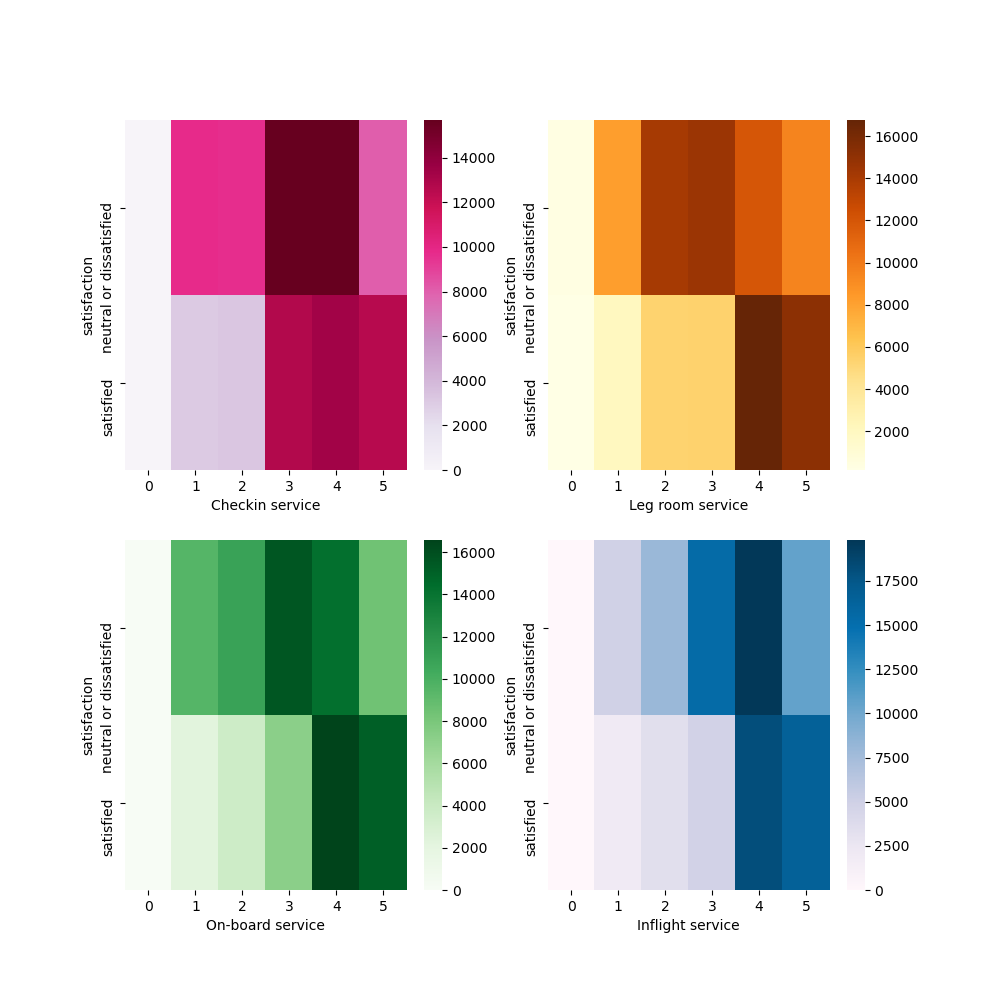

<AxesSubplot:xlabel='Inflight service', ylabel='satisfaction'>

In [58]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

table1 = pd.crosstab(traindata['satisfaction'], traindata['Checkin service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(traindata['satisfaction'], traindata['Leg room service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(traindata['satisfaction'], traindata['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(traindata['satisfaction'], traindata['Inflight service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

Checkin Service, Leg-room Service, On-board Service and Inflight Service:
For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied. For other three services mentioned above, only the customers or passengers who give 4 and 5 rating belong to satisfied passengers category.

# MULTIVARIATE ANALYSIS

<IPython.core.display.Javascript object>


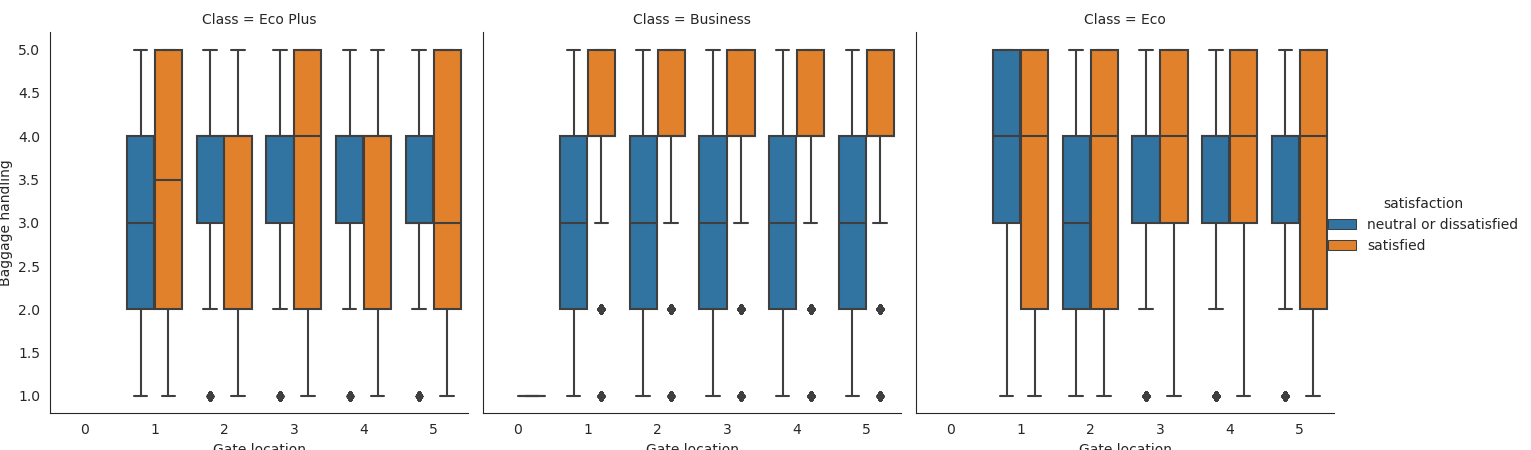

In [59]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=traindata, kind="box", height=4.5, aspect=1.0)

For business class passengers, it is observed that all gate locations have higher number of neutral/dissatisfied passengers when baggage handling is not upto the satisfactory level (rating <= 4). For Eco Plus class, when the gate location is 1 and for Eco class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating 2 to 4), passengers remained neutral/dissatisfied.

# MODEL BUILDING

In [60]:
traindata.shape

(103904, 20)

In [61]:
traindata.dtypes

Gender                    object
Customer Type             object
Age                        int64
Type of Travel            object
Class                     object
Flight Distance            int64
Inflight wifi service      int64
Ease of Online booking     int64
Gate location              int64
Food and drink             int64
Online boarding            int64
Seat comfort               int64
Inflight entertainment     int64
On-board service           int64
Leg room service           int64
Baggage handling           int64
Checkin service            int64
Inflight service           int64
Cleanliness                int64
satisfaction              object
dtype: object

In [62]:
traindata['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
testdata['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [63]:
print(traindata.describe(include='all'))
print(testdata.describe(include='all'))

        Gender   Customer Type            Age   Type of Travel     Class  \
count   103904          103904  103904.000000           103904    103904   
unique       2               2            NaN                2         3   
top     Female  Loyal Customer            NaN  Business travel  Business   
freq     52727           84923            NaN            71655     49665   
mean       NaN             NaN      39.379706              NaN       NaN   
std        NaN             NaN      15.114964              NaN       NaN   
min        NaN             NaN       7.000000              NaN       NaN   
25%        NaN             NaN      27.000000              NaN       NaN   
50%        NaN             NaN      40.000000              NaN       NaN   
75%        NaN             NaN      51.000000              NaN       NaN   
max        NaN             NaN      85.000000              NaN       NaN   

        Flight Distance  Inflight wifi service  Ease of Online booking  \
count     103

In [64]:
cat_cols=traindata.select_dtypes(include=['object'])
print(cat_cols.columns)
cat_cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


Gender      Customer Type   Type of Travel     Class
0         Male     Loyal Customer  Personal Travel  Eco Plus
1         Male  disloyal Customer  Business travel  Business
2       Female     Loyal Customer  Business travel  Business
3       Female     Loyal Customer  Business travel  Business
4         Male     Loyal Customer  Business travel  Business
...        ...                ...              ...       ...
103899  Female  disloyal Customer  Business travel       Eco
103900    Male     Loyal Customer  Business travel  Business
103901    Male  disloyal Customer  Business travel  Business
103902  Female  disloyal Customer  Business travel       Eco
103903    Male     Loyal Customer  Business travel  Business

[103904 rows x 4 columns]

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#for train data
for col in cat_cols:
    traindata[col] = label_encoder.fit_transform(traindata[col])
print(traindata)

        Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight wifi service  Ease of Online booking  Gate loc

In [66]:
#for test data
for col in cat_cols:
    testdata[col] = label_encoder.fit_transform(testdata[col])
print(testdata)

       Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0           0              0   52               0      1              160   
1           0              0   36               0      0             2863   
2           1              1   20               0      1              192   
3           1              0   44               0      0             3377   
4           0              0   49               0      1             1182   
...       ...            ...  ...             ...    ...              ...   
25971       1              1   34               0      0              526   
25972       1              0   23               0      0              646   
25973       0              0   17               1      1              828   
25974       1              0   14               0      0             1127   
25975       0              0   42               1      1              264   

       Inflight wifi service  Ease of Online booking  Gate location  \
0   

<ipython-input-67-536500debb60>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<IPython.core.display.Javascript object>


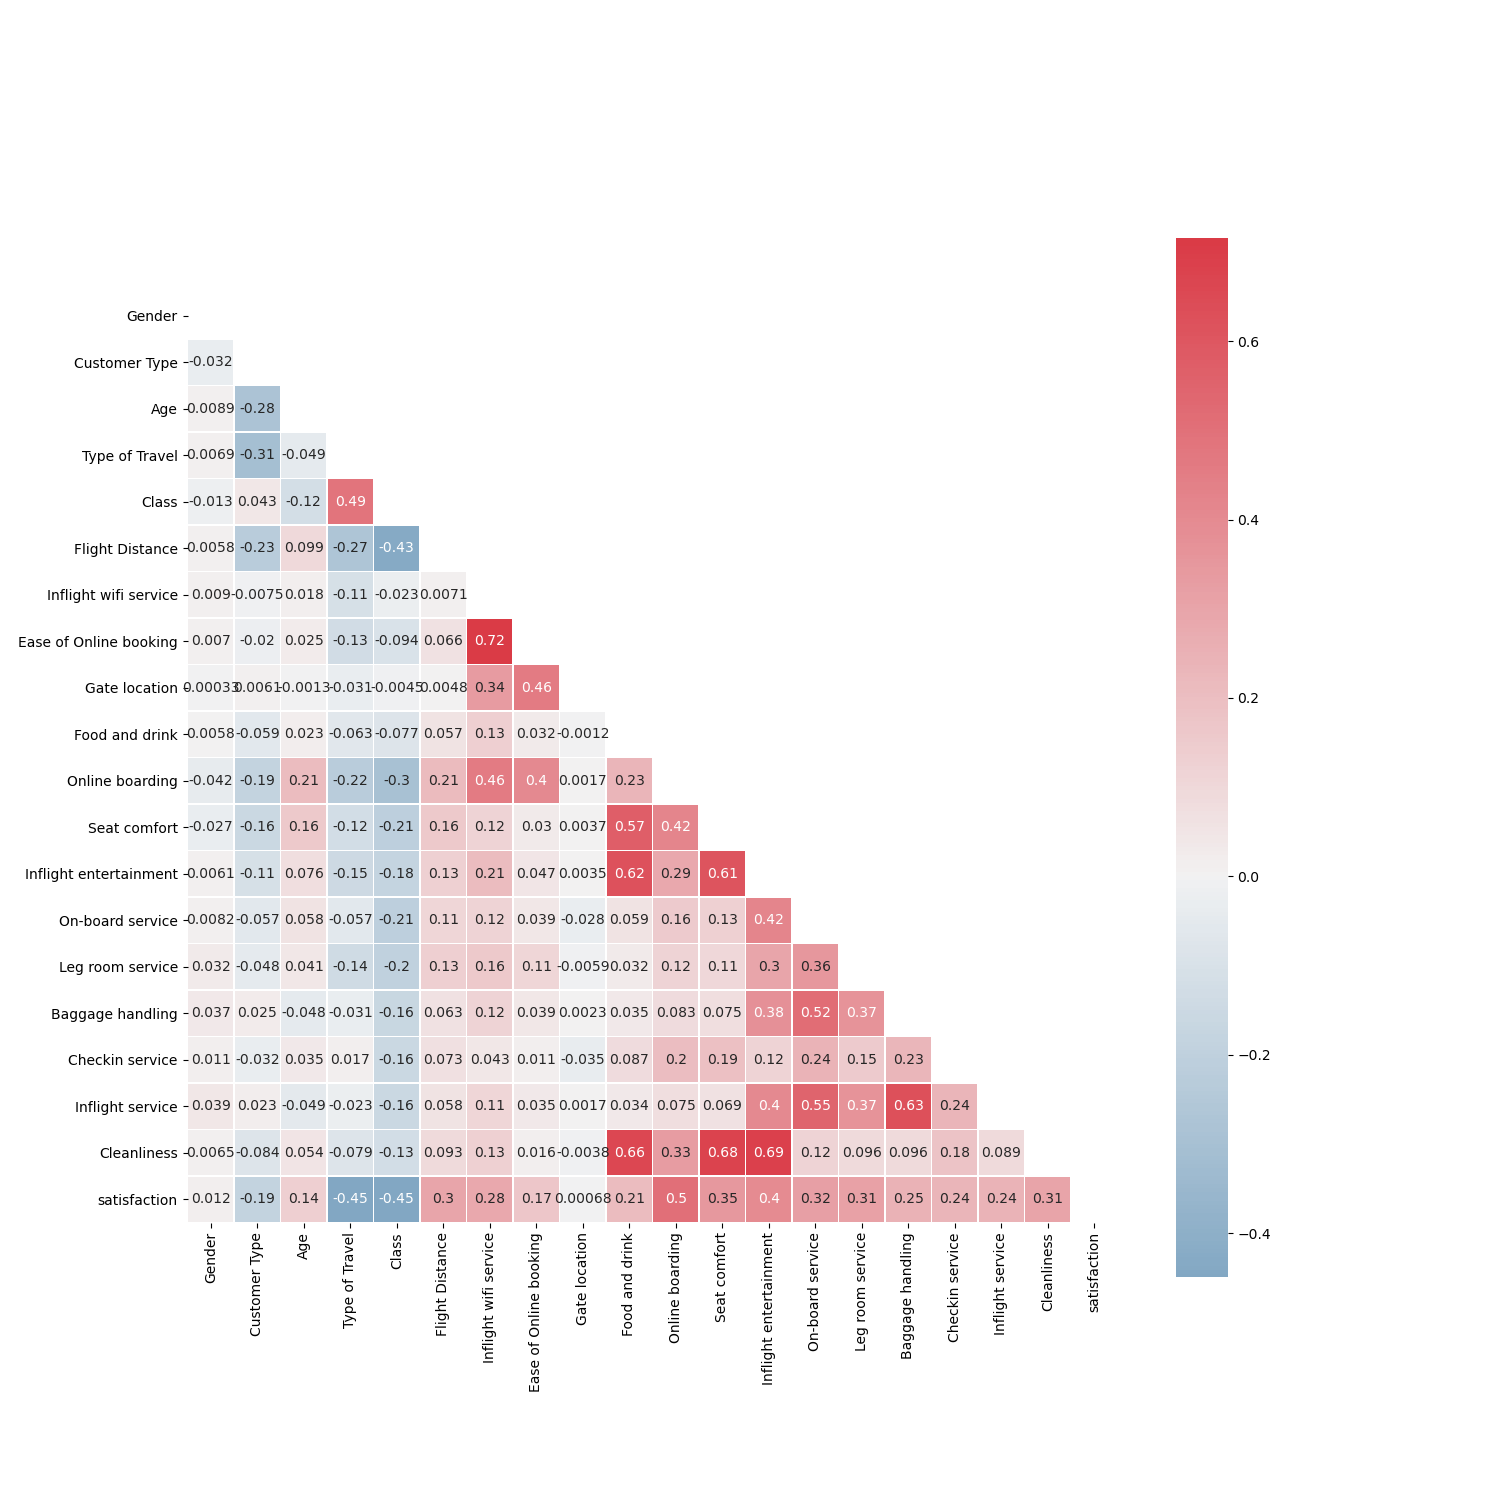

<AxesSubplot:>

In [67]:
corr = traindata.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [68]:
traindata.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Ease of Online booking  Gate location  \
0                      3                       3              1   
1                      3                       3              3   
2                      2                       2              2   
3                      2                       5              5   
4                      3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  satisfaction  
0                 5            5             0  
1                 4            1             0  
2                 4            5             1  
3                 4            2             0  
4                 3            3             1

In [69]:
target=traindata['satisfaction']
traindata.drop(['satisfaction'],axis=1,inplace=True)
target1=testdata['satisfaction']
testdata.drop(['satisfaction'],axis=1,inplace=True)

In [70]:
X_train=traindata
y_train=target
X_test=testdata
y_test=target1

In [71]:
traindata.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Ease of Online booking  Gate location  \
0                      3                       3              1   
1                      3                       3              3   
2                      2                       2              2   
3                      2                       5              5   
4                      3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  
0                 5            5  
1                 4            1  
2                 4            5  
3                 4            2  
4                 3            3

In [72]:
from sklearn.feature_selection import SelectKBest, chi2

X = traindata
y = target
selector = SelectKBest(chi2, k=12)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Cleanliness'],
      dtype='object')


In [73]:
features=['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Cleanliness']

In [74]:
X_train = traindata[features]
y_train = target
X_test = testdata[features]
y_test = target1

In [75]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
# Logistic Regreesion Model
def model_lr(X_train,X_test,y_train,y_test):
    global acc_lr,f1_lr

    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Logistic Regression***********')
    print('\n')
    print('Accuracy : ',acc_lr)
    print('F1 Score : ',f1_lr)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_lr)
    print(10*'=====')
    print('Classification Report :\n',clf_lr)
    print(30*'========')

# Naive Bayes Model
def model_nb(X_train,X_test,y_train,y_test):
    global acc_nb,f1_nb

    lr=GaussianNB()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    conf_nb=confusion_matrix(y_test,y_pred)
    acc_nb=accuracy_score(y_test,y_pred)
    f1_nb=f1_score(y_test,y_pred)
    clf_nb=classification_report(y_test,y_pred)

    print('***********Gaussian Naive Bayes***********')
    print('\n')
    print('Accuracy : ',acc_nb)
    print('F1 Score : ',f1_nb)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_nb)
    print(10*'=====')
    print('Classification Report :\n',clf_nb)
    print(30*'========')

# Decision Tree Model
def model_dt(X_train,X_test,y_train,y_test):
    global acc_dt,f1_dt

    lr=DecisionTreeClassifier()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    conf_dt=confusion_matrix(y_test,y_pred)
    acc_dt=accuracy_score(y_test,y_pred)
    f1_dt=f1_score(y_test,y_pred)
    clf_dt=classification_report(y_test,y_pred)

    print('***********Decision Tree***********')
    print('\n')
    print('Accuracy : ',acc_dt)
    print('F1 Score : ',f1_dt)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_dt)
    print(10*'=====')
    print('Classification Report :\n',clf_dt)
    print(30*'========')

# K Nearest Neighbor Model
def model_knn(X_train,X_test,y_train,y_test):
    global acc_knn,f1_knn

    lr=KNeighborsClassifier()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    conf_knn=confusion_matrix(y_test,y_pred)
    acc_knn=accuracy_score(y_test,y_pred)
    f1_knn=f1_score(y_test,y_pred)
    clf_knn=classification_report(y_test,y_pred)

    print('***********K Nearest Neighbor***********')
    print('\n')
    print('Accuracy : ',acc_knn)
    print('F1 Score : ',f1_knn)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_knn)
    print(10*'=====')
    print('Classification Report :\n',clf_knn)
    print(30*'========')

# Random Forest Model
def model_rf(X_train,X_test,y_train,y_test):
    global acc_rf,f1_rf

    lr=RandomForestClassifier()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    conf_rf=confusion_matrix(y_test,y_pred)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    clf_rf=classification_report(y_test,y_pred)

    print('***********Random Forest***********')
    print('\n')
    print('Accuracy : ',acc_rf)
    print('F1 Score : ',f1_rf)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_rf)
    print(10*'=====')
    print('Classification Report :\n',clf_rf)
    print(30*'========')

# Adaptive Boosting Model
def model_ab(X_train,X_test,y_train,y_test):
    global acc_ab,f1_ab

    lr=AdaBoostClassifier()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    conf_ab=confusion_matrix(y_test,y_pred)
    acc_ab=accuracy_score(y_test,y_pred)
    f1_ab=f1_score(y_test,y_pred)
    clf_ab=classification_report(y_test,y_pred)

    print('***********Adaptive Boosting***********')
    print('\n')
    print('Accuracy : ',acc_ab)
    print('F1 Score : ',f1_ab)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_ab)
    print(10*'=====')
    print('Classification Report :\n',clf_ab)
    print(30*'========')
    
    #XG boosting Model

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def model_xgb(X_train, X_test, y_train, y_test):
    global acc_ab, f1_ab

    lr = XGBClassifier()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    conf_ab = confusion_matrix(y_test, y_pred)
    acc_ab = accuracy_score(y_test, y_pred)
    f1_ab = f1_score(y_test, y_pred)
    clf_ab = classification_report(y_test, y_pred)

    print('***********XGBoost***********')
    print('\n')
    print('Accuracy : ', acc_ab)
    print('F1 Score : ', f1_ab)
    print(10*'=====')
    print('Confusion Matrix :\n', conf_ab)
    print(10*'=====')
    print('Classification Report :\n', clf_ab)
    print(30*'========')




In [79]:
model_lr(X_train,X_test,y_train,y_test)
model_nb(X_train,X_test,y_train,y_test)
model_dt(X_train,X_test,y_train,y_test)
model_knn(X_train,X_test,y_train,y_test)
model_rf(X_train,X_test,y_train,y_test)
model_ab(X_train,X_test,y_train,y_test)
model_xgb(X_train,X_test,y_train,y_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



*********** Logistic Regression***********


Accuracy :  0.8386202648598706
F1 Score :  0.8189513690938931
Confusion Matrix :
 [[12303  2270]
 [ 1922  9481]]
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     14573
           1       0.81      0.83      0.82     11403

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976

***********Gaussian Naive Bayes***********


Accuracy :  0.8614105327995072
F1 Score :  0.8384925975773889
Confusion Matrix :
 [[13031  1542]
 [ 2058  9345]]
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.89      0.88     14573
           1       0.86      0.82      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86  

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Fit the best model on the training data
best_rf.fit(X_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_rf.predict(X_train)
test_pred = best_rf.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Accuracy: 0.9442658607945796
Test Accuracy: 0.9414844471820142


In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_adaboost = grid_search.best_estimator_

# Fit the best model on the training data
best_adaboost.fit(X_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_adaboost.predict(X_train)
test_pred = best_adaboost.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Train Accuracy: 0.9220241761626117
Test Accuracy: 0.9200415768401602


In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Fit the best model on the training data
best_xgb.fit(X_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_xgb.predict(X_train)
test_pred = best_xgb.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Train Accuracy: 0.9605886202648599
Test Accuracy: 0.9517246689251617


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

# Fit the best model on the training data
best_dt.fit(X_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_dt.predict(X_train)
test_pred = best_dt.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Accuracy: 0.9701358946720049
Test Accuracy: 0.9361718509393286


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression classifier
lr = LogisticRegression()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Fit the best model on the training data
best_lr.fit(X_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_lr.predict(X_train)
test_pred = best_lr.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Dell\anaconda3\lib\

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.865991684631968
Test Accuracy: 0.8607560825377272


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Fit the best model on the training data
best_knn.fit(X_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_knn.predict(X_train)
test_pred = best_knn.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Train Accuracy: 0.999951878657222
Test Accuracy: 0.8495534339390206


In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Predict on the train and test data
train_pred = nb.predict(X_train)
test_pred = nb.predict(X_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.8648848937480752
Test Accuracy: 0.8614105327995072


<IPython.core.display.Javascript object>


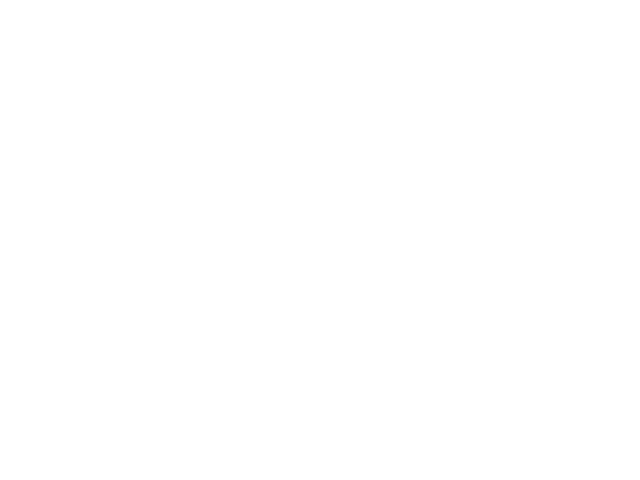

<IPython.core.display.Javascript object>


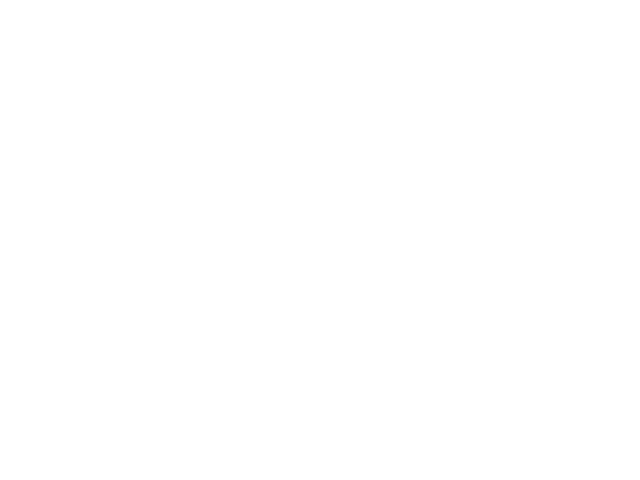

<IPython.core.display.Javascript object>


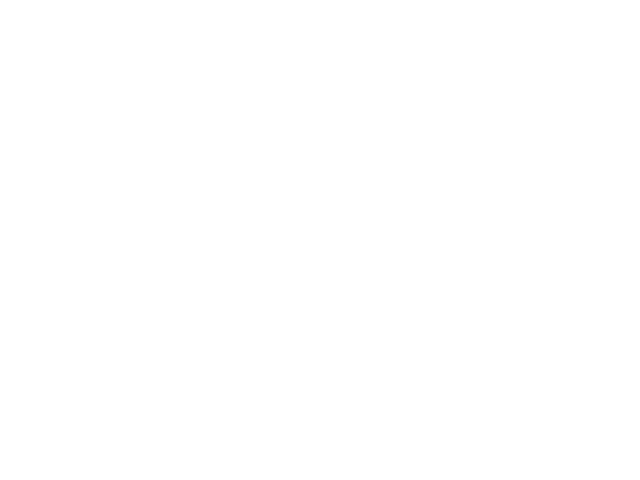

<IPython.core.display.Javascript object>


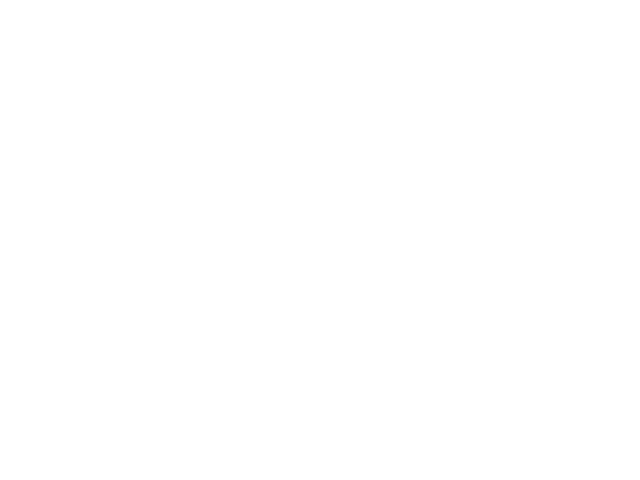

<IPython.core.display.Javascript object>


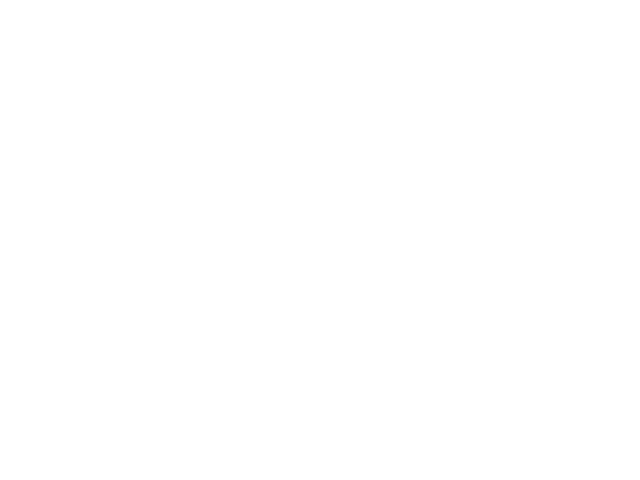

<IPython.core.display.Javascript object>


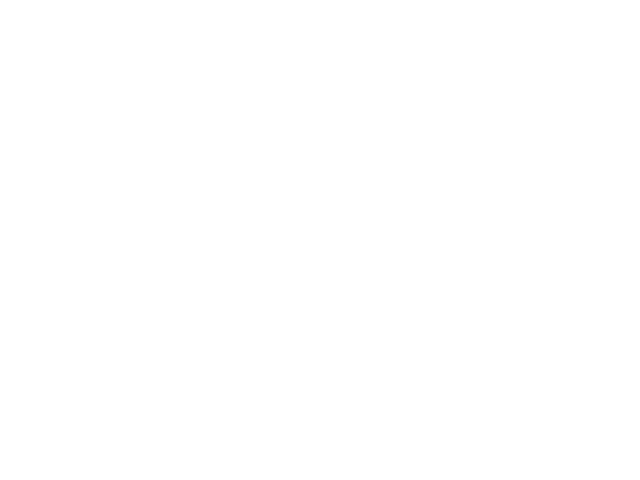

<IPython.core.display.Javascript object>


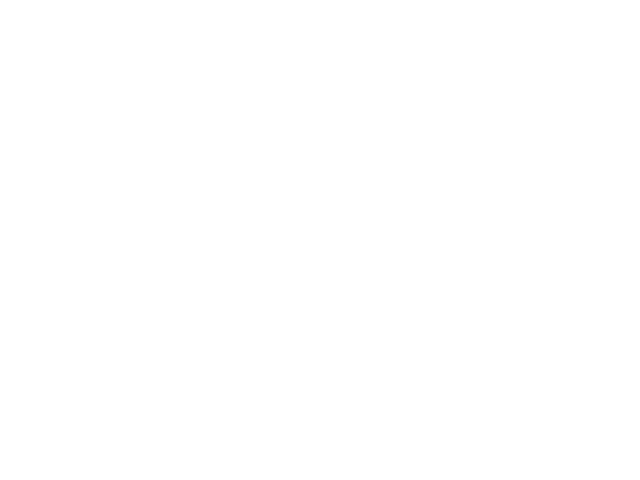

<IPython.core.display.Javascript object>


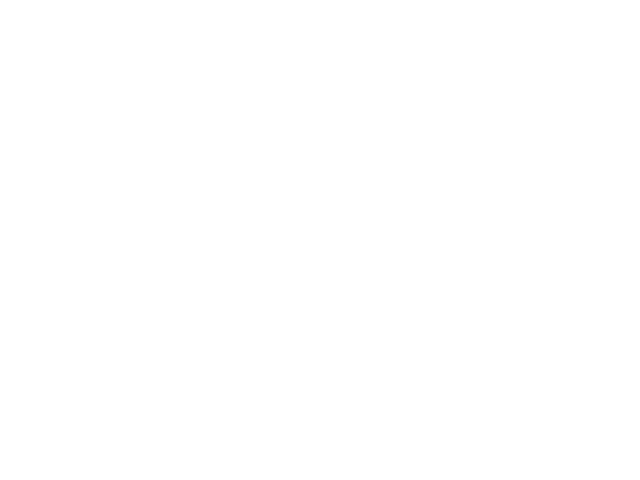

<IPython.core.display.Javascript object>


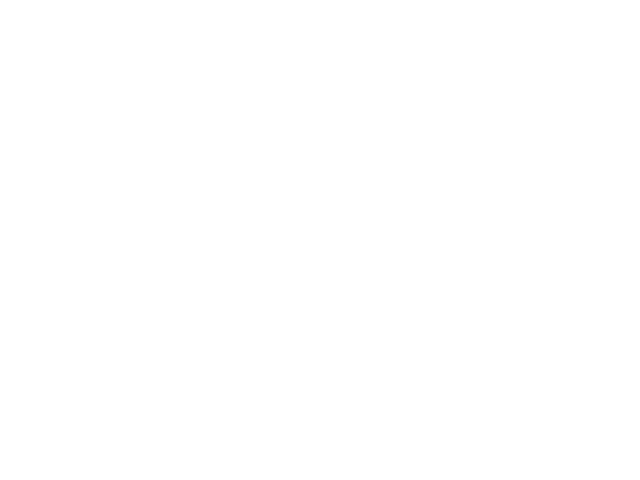

<IPython.core.display.Javascript object>


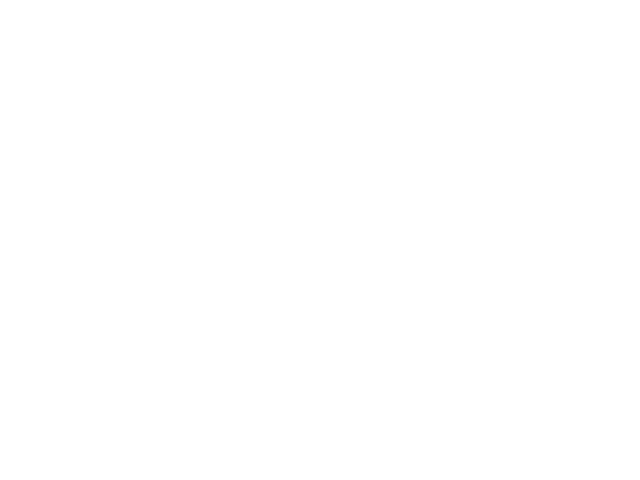

<IPython.core.display.Javascript object>


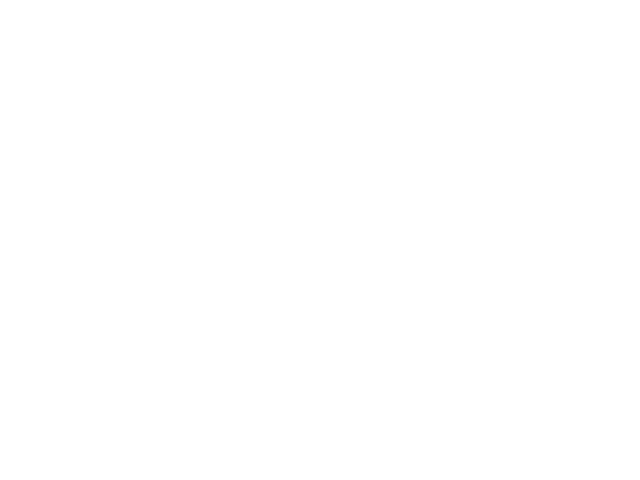

<IPython.core.display.Javascript object>


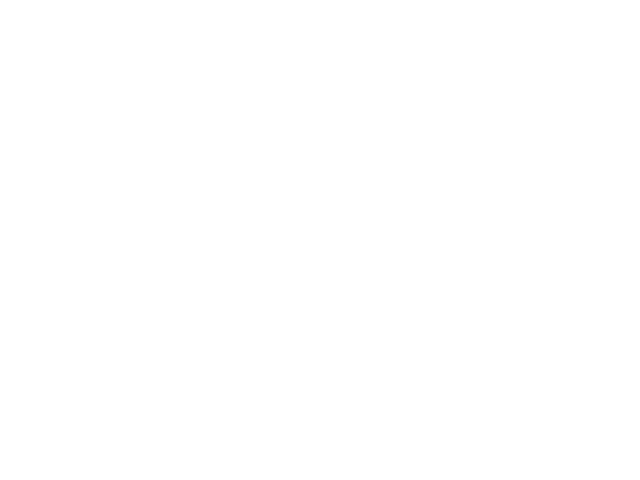

<IPython.core.display.Javascript object>


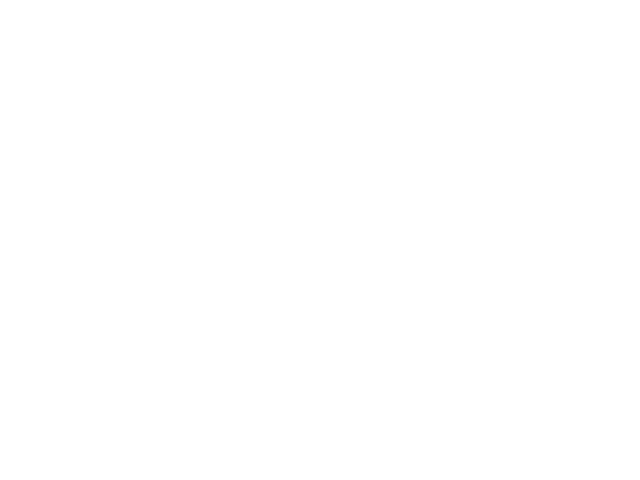

<IPython.core.display.Javascript object>


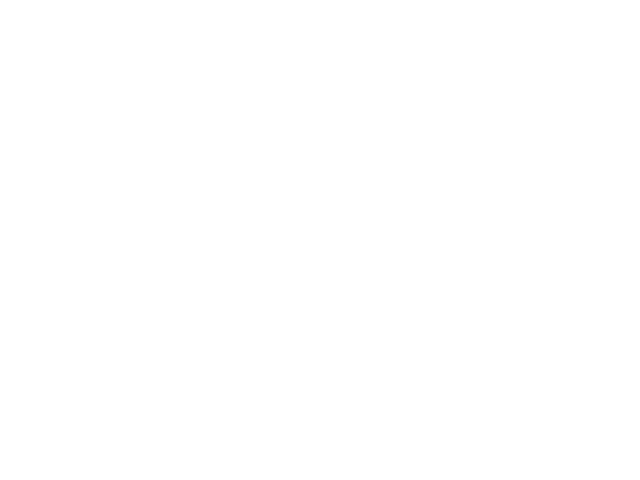

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score

# Define a list of classifiers and their names
classifiers = [
    ('Random Forest', best_rf),
    ('AdaBoost', best_adaboost),
    ('XGBoost', best_xgb),
    ('Decision Tree', best_dt),
    ('Logistic Regression', best_lr),
    ('KNN', best_knn),
    ('Naive Bayes', nb)
]

# Plot confusion matrix and ROC curve for each classifier
for name, classifier in classifiers:
    # Plot confusion matrix
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp.ax_.set_title(f'Confusion Matrix - {name}')
    plt.show()

    # Plot ROC curve
    y_scores = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()


<IPython.core.display.Javascript object>


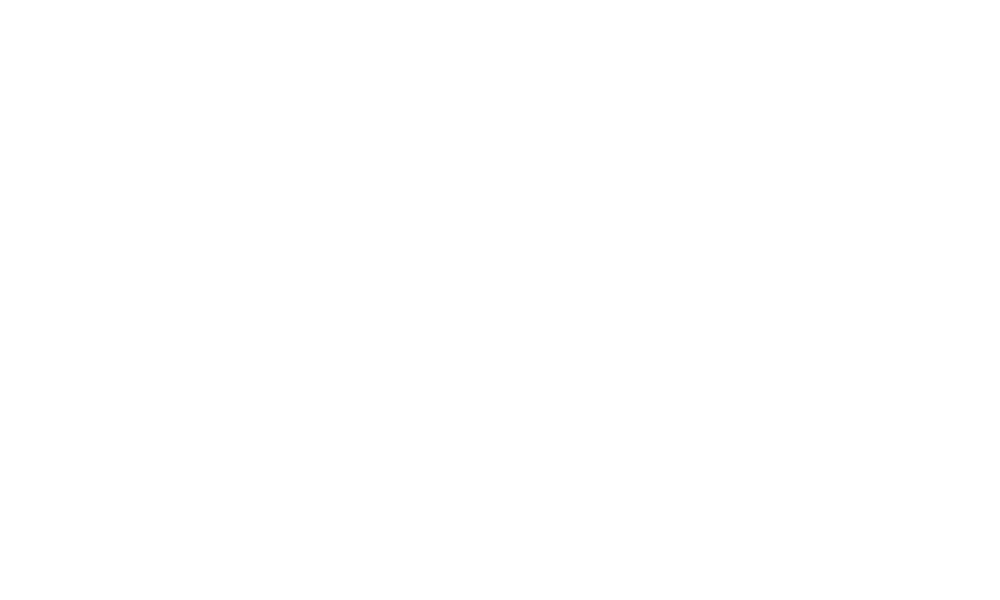

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Define a list of classifiers and their names
classifiers = [
    ('Random Forest', best_rf),
    ('AdaBoost', best_adaboost),
    ('XGBoost', best_xgb),
    ('Decision Tree', best_dt),
    ('Logistic Reg', best_lr),
    ('KNN', best_knn),
    ('Naive Bayes', nb)
]

# Initialize lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

# Calculate accuracy score for each classifier
for name, classifier in classifiers:
    accuracy = accuracy_score(y_test, classifier.predict(X_test))
    model_names.append(name)
    accuracy_scores.append(accuracy)

# Generate a list of colors for the models
colors = plt.cm.tab10(np.arange(len(model_names)))

# Plot accuracy comparison horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color=colors)
plt.xlim([0.0, 1.0])
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy Comparison')

# Add accuracy values to the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(acc + 0.01, i, f'{acc:.2f}', va='center')

plt.show()


<IPython.core.display.Javascript object>


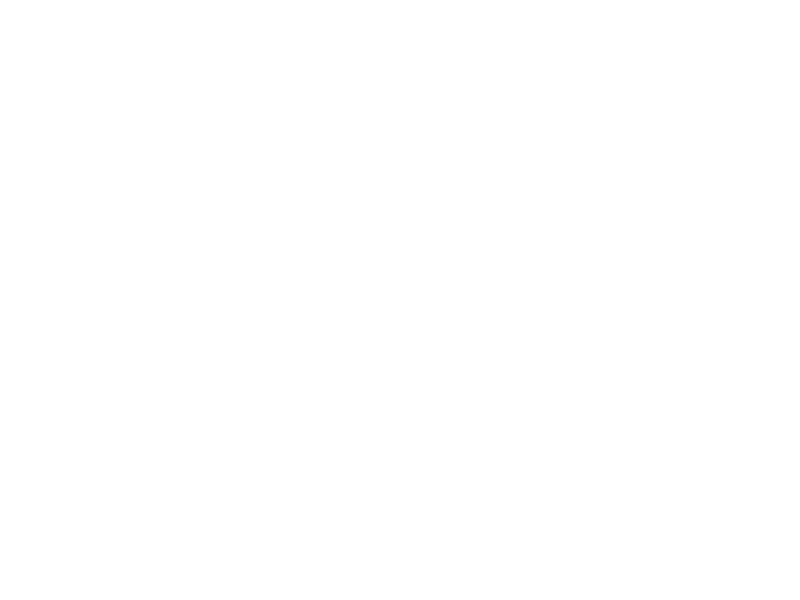

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define a list of classifiers and their names
classifiers = [
    ('Random Forest', best_rf),
    ('AdaBoost', best_adaboost),
    ('XGBoost', best_xgb),
    ('Decision Tree', best_dt),
    ('Logistic Regression', best_lr),
    ('KNN', best_knn),
    ('Naive Bayes', nb)
]

# Set up the figure and axes
plt.figure(figsize=(8, 6))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Plot ROC curve for each classifier
for name, classifier in classifiers:
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Customize the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Evaluate RandomForestClassifier
rf_train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
rf_precision = precision_score(y_test, best_rf.predict(X_test))
rf_recall = recall_score(y_test, best_rf.predict(X_test))
rf_f1_score = f1_score(y_test, best_rf.predict(X_test))
rf_probabilities = best_rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# Evaluate AdaBoostClassifier
adaboost_train_accuracy = accuracy_score(y_train, best_adaboost.predict(X_train))
adaboost_test_accuracy = accuracy_score(y_test, best_adaboost.predict(X_test))
adaboost_precision = precision_score(y_test, best_adaboost.predict(X_test))
adaboost_recall = recall_score(y_test, best_adaboost.predict(X_test))
adaboost_f1_score = f1_score(y_test, best_adaboost.predict(X_test))
adaboost_probabilities = best_adaboost.predict_proba(X_test)[:, 1]
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probabilities)
adaboost_auc = roc_auc_score(y_test, adaboost_probabilities)

# Evaluate XGBClassifier
xgb_train_accuracy = accuracy_score(y_train, best_xgb.predict(X_train))
xgb_test_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))
xgb_precision = precision_score(y_test, best_xgb.predict(X_test))
xgb_recall = recall_score(y_test, best_xgb.predict(X_test))
xgb_f1_score = f1_score(y_test, best_xgb.predict(X_test))
xgb_probabilities = best_xgb.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)
xgb_auc = roc_auc_score(y_test, xgb_probabilities)

# Evaluate DecisionTreeClassifier
dt_train_accuracy = accuracy_score(y_train, best_dt.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, best_dt.predict(X_test))
dt_precision = precision_score(y_test, best_dt.predict(X_test))
dt_recall = recall_score(y_test, best_dt.predict(X_test))
dt_f1_score = f1_score(y_test, best_dt.predict(X_test))
dt_probabilities = best_dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probabilities)
dt_auc = roc_auc_score(y_test, dt_probabilities)

# Evaluate LogisticRegression
lr_train_accuracy = accuracy_score(y_train, best_lr.predict(X_train))
lr_test_accuracy = accuracy_score(y_test, best_lr.predict(X_test))
lr_precision = precision_score(y_test, best_lr.predict(X_test))
lr_recall = recall_score(y_test, best_lr.predict(X_test))
lr_f1_score = f1_score(y_test, best_lr.predict(X_test))
lr_probabilities = best_lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)
lr_auc = roc_auc_score(y_test, lr_probabilities)

knn_test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
knn_precision = precision_score(y_test, best_knn.predict(X_test))
knn_recall = recall_score(y_test, best_knn.predict(X_test))
knn_f1_score = f1_score(y_test, best_knn.predict(X_test))
knn_probabilities = best_knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probabilities)
knn_auc = roc_auc_score(y_test, knn_probabilities)

# Evaluate GaussianNB
nb_train_accuracy = accuracy_score(y_train, nb.predict(X_train))
nb_test_accuracy = accuracy_score(y_test, nb.predict(X_test))
nb_precision = precision_score(y_test, nb.predict(X_test))
nb_recall = recall_score(y_test, nb.predict(X_test))
nb_f1_score = f1_score(y_test, nb.predict(X_test))
nb_probabilities = nb.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probabilities)
nb_auc = roc_auc_score(y_test, nb_probabilities)

# Print the evaluation results
print("Random Forest Classifier:")
print("Train Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print("AUC:", rf_auc)

print("AdaBoost Classifier:")
print("Train Accuracy:", adaboost_train_accuracy)
print("Test Accuracy:", adaboost_test_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1 Score:", adaboost_f1_score)
print("AUC:", adaboost_auc)



Random Forest Classifier:
Train Accuracy: 0.9442658607945796
Test Accuracy: 0.9414844471820142
Precision: 0.9414024117909782
Recall: 0.9242304656669298
F1 Score: 0.9327374103903001
AUC: 0.9870333980220083
AdaBoost Classifier:
Train Accuracy: 0.9220241761626117
Test Accuracy: 0.9200415768401602
Precision: 0.9167113494191242
Recall: 0.8995878277646233
F1 Score: 0.9080688708892134
AUC: 0.9728494656316599
